# PROJECT TITLE: ONLINE PAYMENT FRAUD DETECTION
PROJECT DEFINITION: Fraud detection is defined as a process that detects scams and prevents fraudsters from obtaining money or property through false means. Fraud is a serious business risk that needs to be identified and mitigated in time.

PROBLEM STATEMENT: The aim of this project is to predict online payment fraud in Bank.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("online payment fraud detection.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


# The features in the dataset
step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig:customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrg: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recepient before the transaction

newbalanceDest: the new balance of the receipient after the transaction

isFraud: fraud transaction

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot:title={'center':'missing data visualization in the dataset'}>

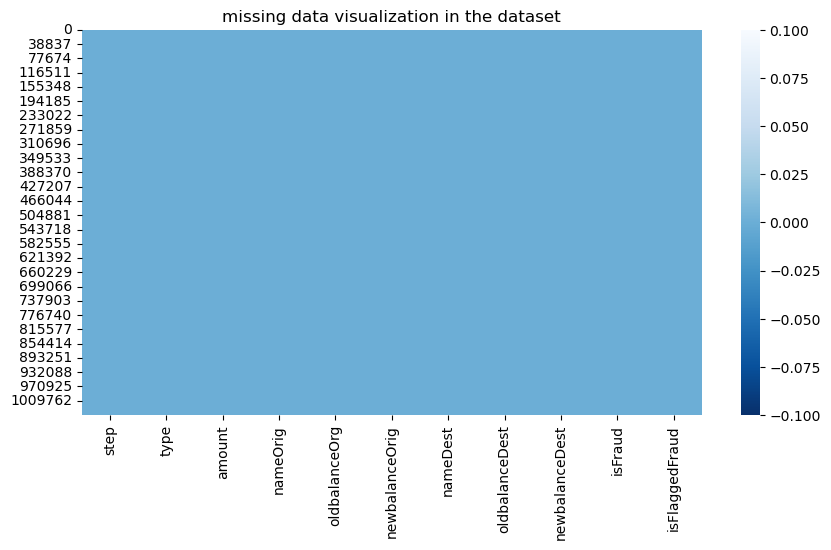

In [6]:
# To visualize the missing values

plt.figure(figsize = (10,5))
plt.title ("missing data visualization in the dataset")
sns.heatmap(df.isnull(), cbar =True, cmap= "Blues_r")

There is no missing values in the dataset

# Data Visualization
In this section, we will try to understand and compare all columns. 

Let’s count the columns with different datatypes like Category, Integer, Float. 



In [7]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))
 
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 0
Float variables: 5


<AxesSubplot:xlabel='type', ylabel='count'>

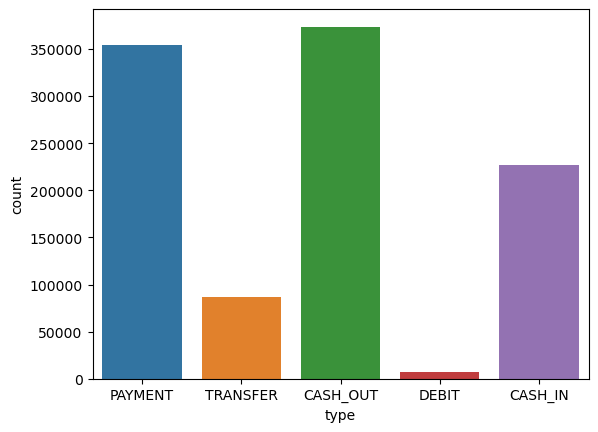

In [8]:
sns.countplot(x='type', data=df)

<AxesSubplot:xlabel='type', ylabel='amount'>

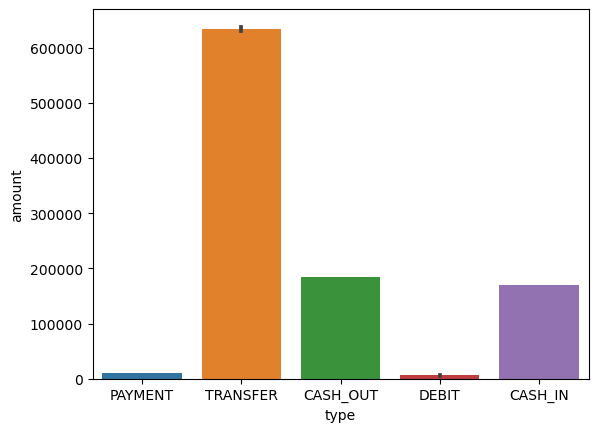

In [9]:
sns.barplot(x='type', y='amount', data=df)

 Both the graph clearly shows that mostly the type cash_out and transfer are maximum in count and as well as in amount. 

<AxesSubplot:xlabel='type', ylabel='step'>

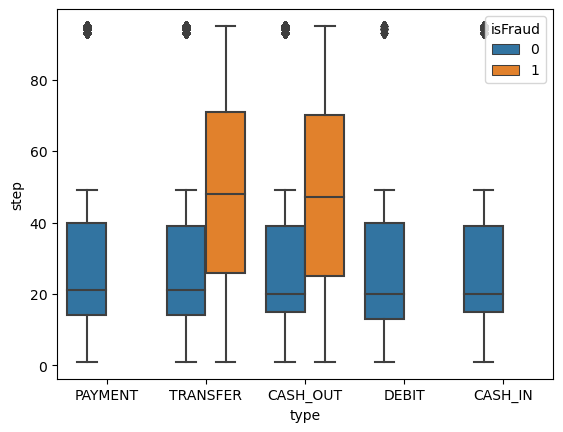

In [10]:
# Visualizing btw step,type and isFraud_label
sns.boxplot(x= "type", y= "step", hue ="isFraud", data= df)

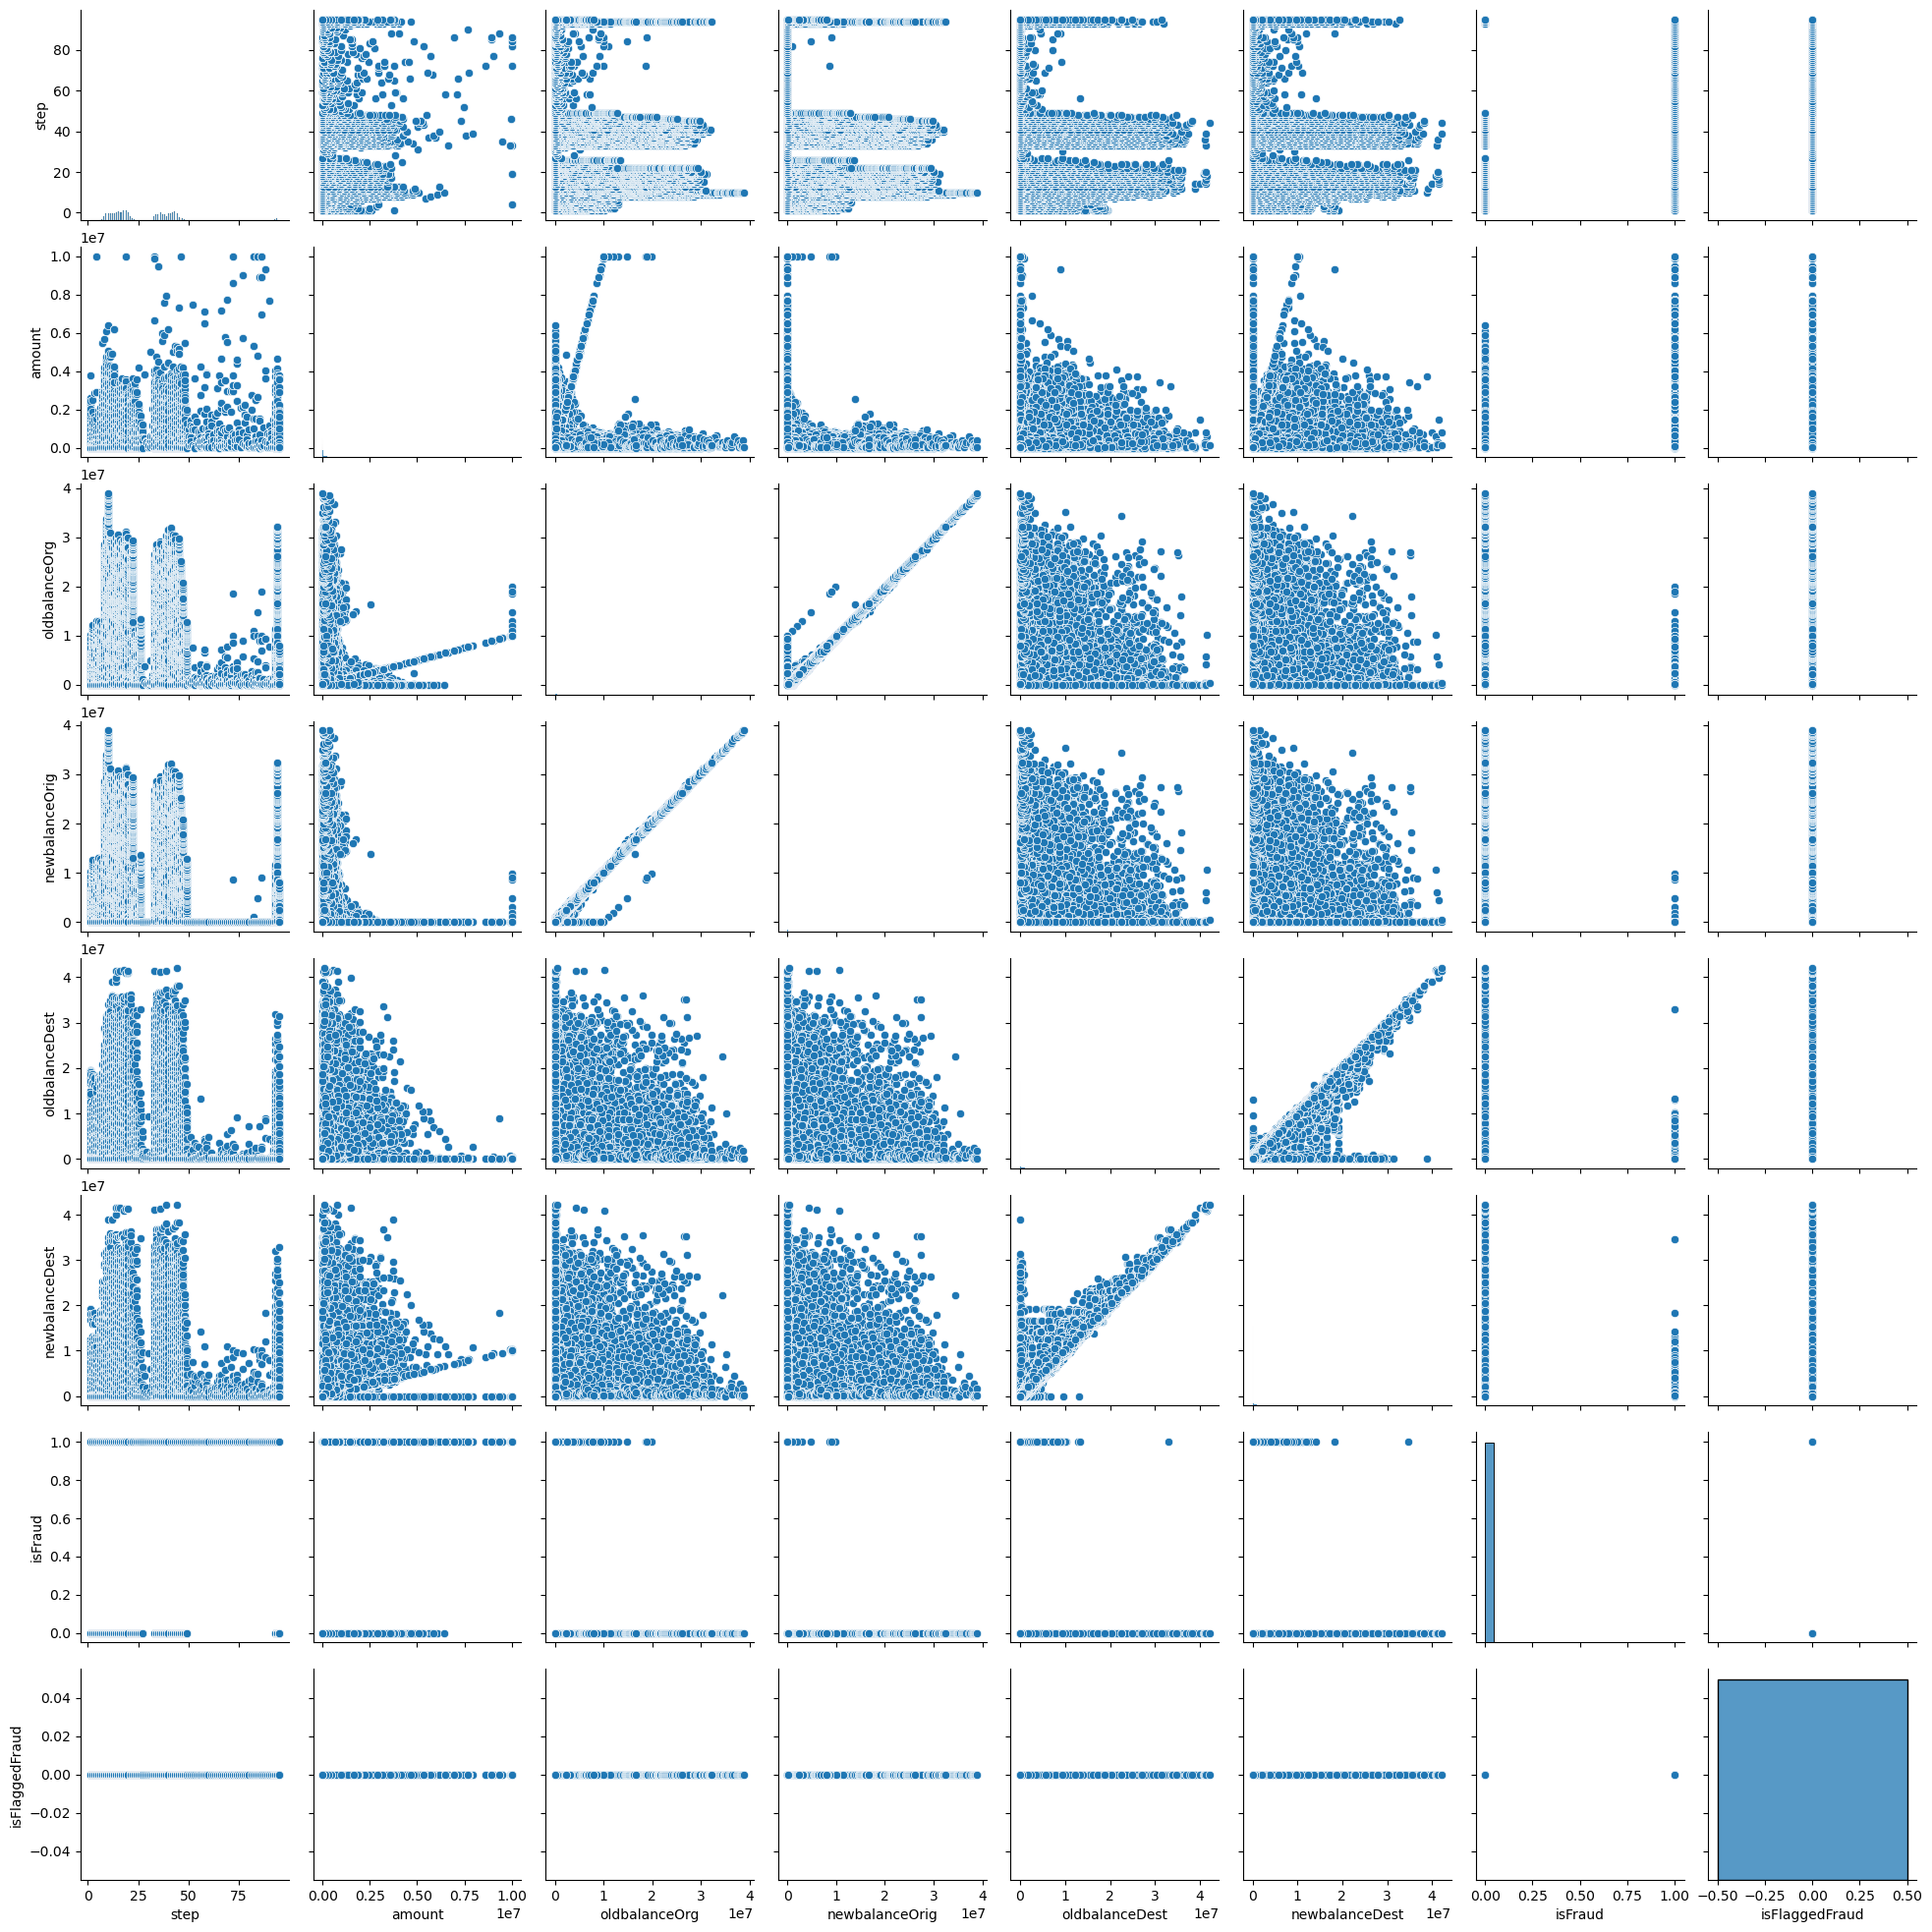

In [11]:
sns.pairplot(df)

In [12]:
df['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='step', ylabel='Density'>

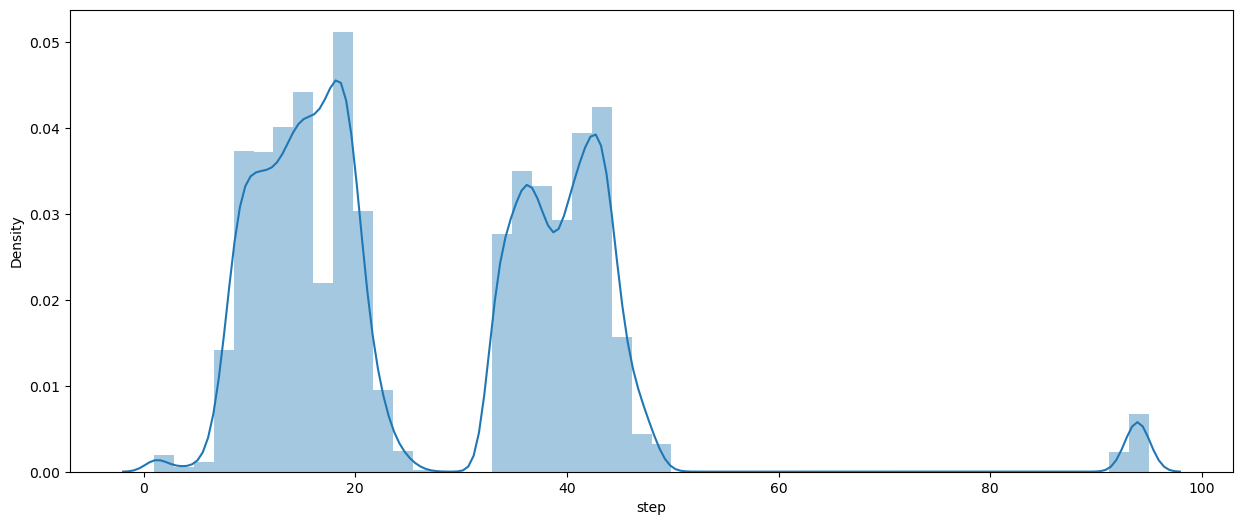

In [13]:
plt.figure(figsize=(15, 6))
sns.distplot(df['step'], bins=50)

<AxesSubplot:>

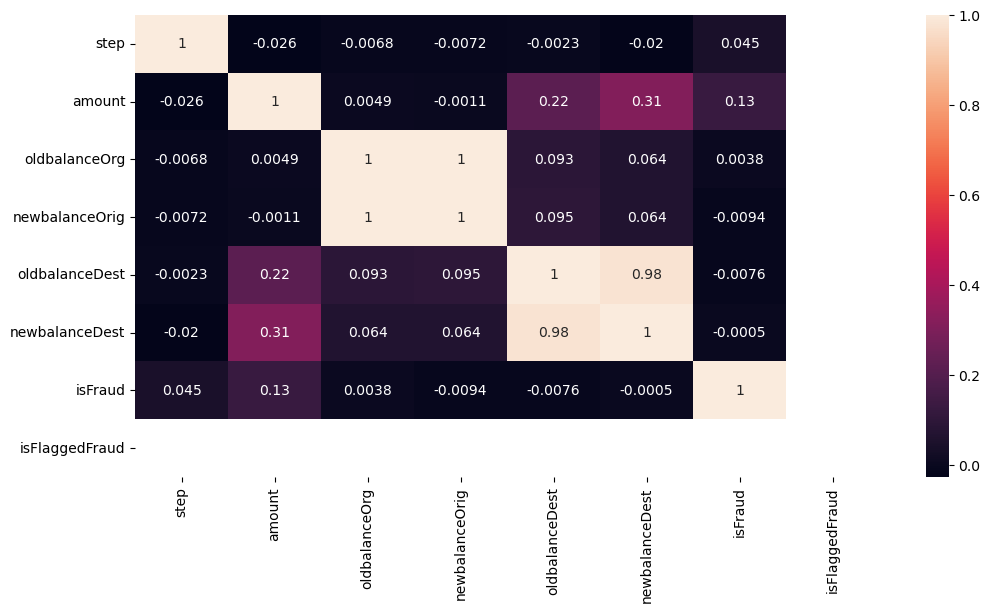

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),annot=True)

In [15]:
#separation of numerical nad categorical column

catcol=[]
numcol=[]

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catcol.append(i)
    else:
        numcol.append(i)

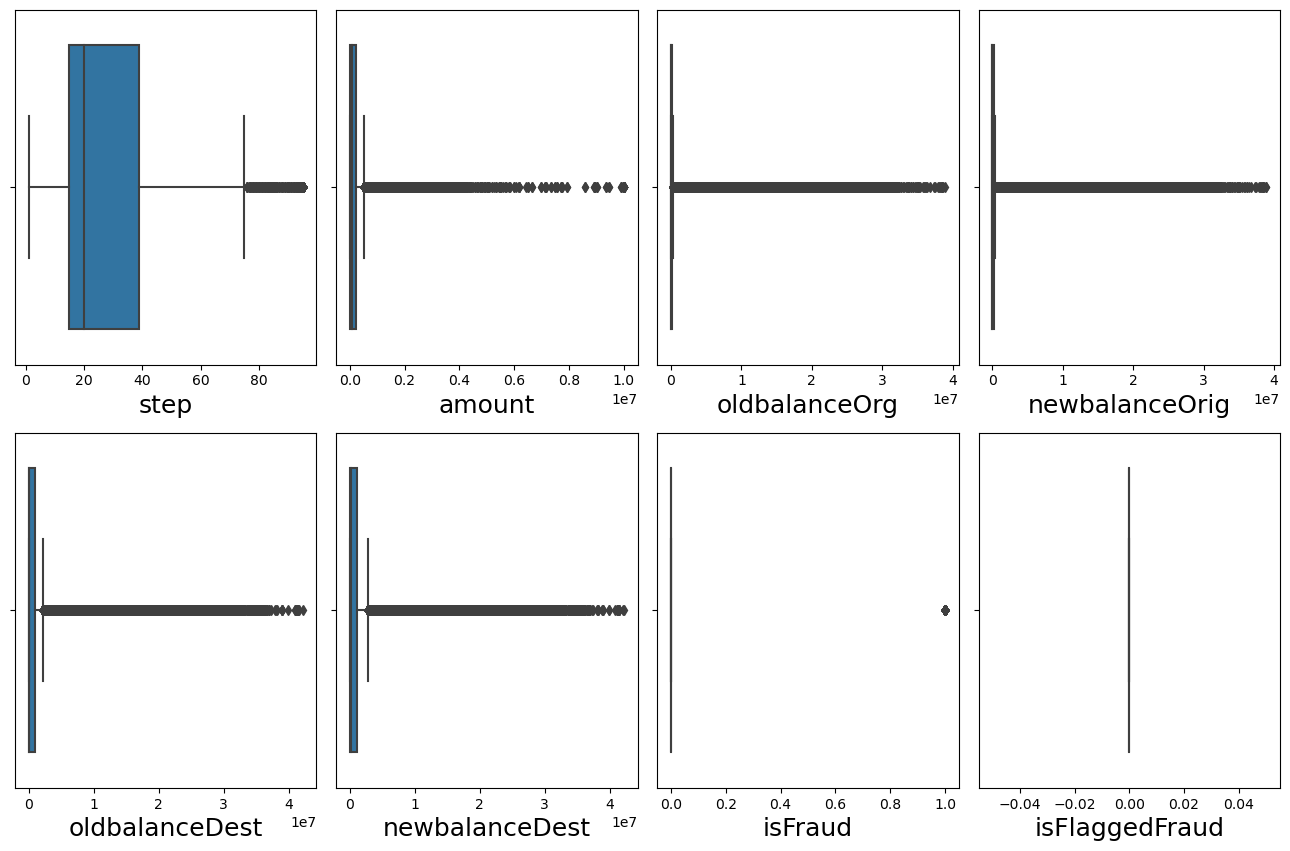

In [16]:
#checking outliers for numerical columns
plt.figure(figsize=(13,25))
pltn=1
for i in numcol:
    if pltn<=23:
        ax=plt.subplot(6,4,pltn)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=18)
        pltn=pltn+1
    plt.tight_layout()

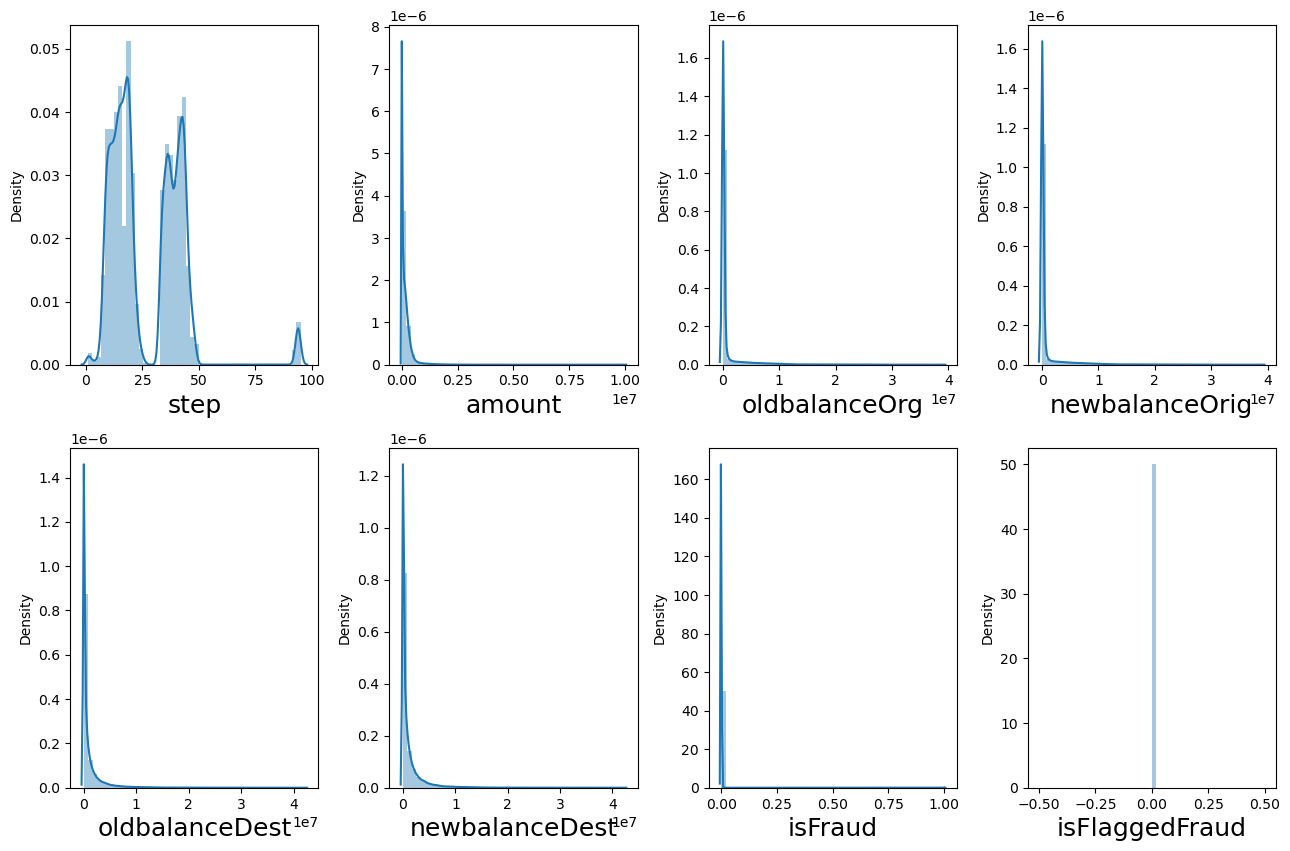

In [17]:
#checking skewness  for numerical columns
plt.figure(figsize=(13,25))
pltn=1
for i in numcol:
    if pltn<=23:
        ax=plt.subplot(6,4,pltn)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=18)
        pltn=pltn+1
    plt.tight_layout()

# Data Preprocessing
This step includes the following : 

.Encoding of Type column
.Dropping irrelevant columns like nameOrig, nameDest
.Data Splitting

In [18]:
typenew = pd.get_dummies(df['type'], drop_first=True)
new_df = pd.concat([df, typenew], axis=1)
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


Once we done with the encoding, now we can drop the irrelevant columns.

In [19]:
x = new_df.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = new_df['isFraud']

In [20]:
x

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,1,0,0,0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,1,0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,1,0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,1,0


In [21]:
y

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

In [22]:
x.shape, y.shape

((1048575, 11), (1048575,))

Now let’s split the data into 2 parts : Training and Testing.

In [23]:
# For splitting the data for the testing and training in the ratio of 30% to 70%:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

Import ML algorithms and initialize them

In [24]:
#import the libraries we will need
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Initialize each models
LR = LogisticRegression(random_state=42)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)

In [26]:
#create list of your model names
models = [LR,KN,DC,RF]

In [27]:
def plot_confusion_matrix(ytest,prediction):
    cm_ = confusion_matrix(ytest,prediction)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
#create function to train a model and evaluate accuracy
def trainer(model,xtrain,ytrain,xtest,ytest):
    #fit your model
    model.fit(xtrain,ytrain)
    #predict on the fitted model
    prediction = model.predict(xtest)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,ytest)))
    print(classification_report(ytest, prediction)) #use this later
    plot_confusion_matrix(ytest,prediction)


For LogisticRegression, Accuracy score is 0.9989128119705124 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314246
           1       0.46      0.29      0.36       327

    accuracy                           1.00    314573
   macro avg       0.73      0.65      0.68    314573
weighted avg       1.00      1.00      1.00    314573



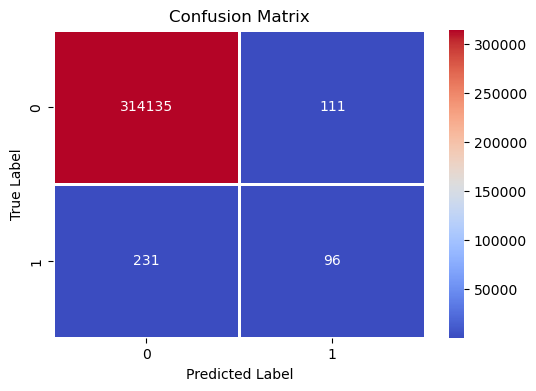


For KNeighborsClassifier, Accuracy score is 0.9993705753513493 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314246
           1       0.80      0.53      0.64       327

    accuracy                           1.00    314573
   macro avg       0.90      0.76      0.82    314573
weighted avg       1.00      1.00      1.00    314573



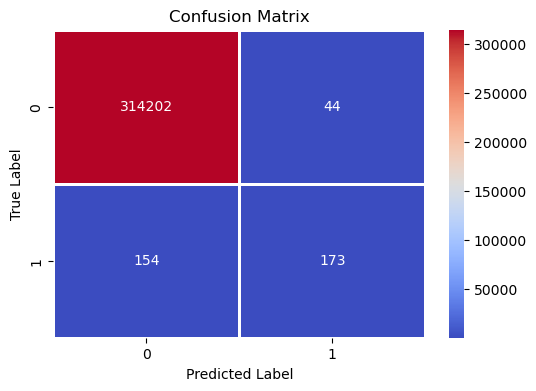


For DecisionTreeClassifier, Accuracy score is 0.9995613100933647 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314246
           1       0.79      0.78      0.79       327

    accuracy                           1.00    314573
   macro avg       0.90      0.89      0.89    314573
weighted avg       1.00      1.00      1.00    314573



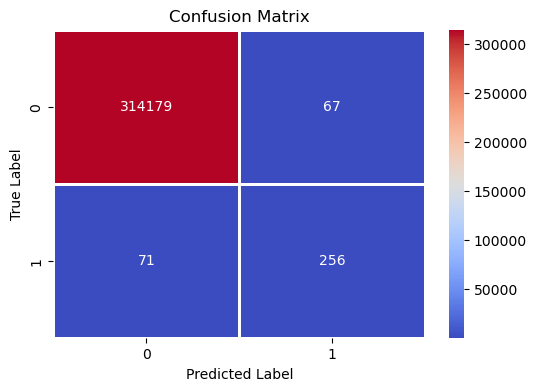


For RandomForestClassifier, Accuracy score is 0.9997615815724807 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314246
           1       0.98      0.79      0.87       327

    accuracy                           1.00    314573
   macro avg       0.99      0.89      0.94    314573
weighted avg       1.00      1.00      1.00    314573



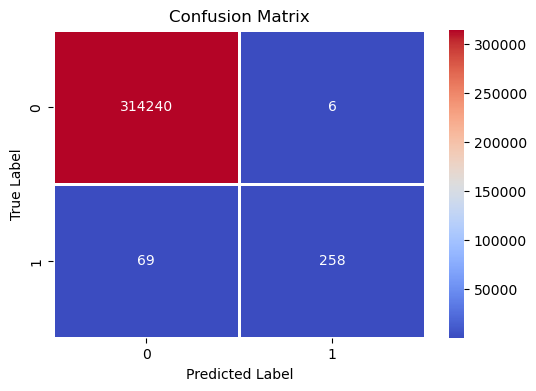

In [30]:
#loop through each model, training in the process
for model in models:
    trainer(model,xtrain,ytrain,xtest,ytest)
    

# Interpretation of the result
The Decision Tree model with default parameters yields 99.95% accuracy on training data.
Precision Score: This means that 82% of all the things we predicted came true. that is 82% of clients transactions was detected to be a fraudulent transaction.

Recall Score: In all the actual positives, we only predicted 79% of it to be true.

Random Forest Tree model with default parameters yields 99.97% accuracy on training data.
Precision Score: This means that 99% of all the things we predicted came true. that is 99% of clients transactions was detected to be a fraudulent transaction.

Recall Score: In all the actual positives, we only predicted 78% of it to be true.

Both the Decision Tree and Random Forest models outperform the Logistic Regression and K-Nearest Neighbors model by a wide margin. Since they both have similar recall scores, we should perform a cross-validation of the two models so we may declare which is the best performer with more certainty.

# Cross Validation

In [31]:
# Importing the library to perform cross-validation
from sklearn.model_selection import cross_validate

# Running the cross-validation on both Decision Tree and Random Forest models; specifying recall as the scoring metric
DC_scores = cross_validate(DC, xtest, ytest, scoring='recall_macro')
RF_scores = cross_validate(RF, xtest, ytest, scoring='recall_macro')

# Printing the means of the cross-validations for both models
print('Decision Tree Recall Cross-Validation:', np.mean(DC_scores['test_score']))
print('Random Forest Recall Cross-Validation:', np.mean(RF_scores['test_score']))

Decision Tree Recall Cross-Validation: 0.8776598499622251
Random Forest Recall Cross-Validation: 0.8823945679400819


# Conclusion
Upon training and evaluating our classification model, we found that the Random Forest model performed the best by a narrow margin.

Therefore, Random Forest performs best with recall cross-validation accuracy of 88% which is important for our problem statement where false negative is our priority

# Recommendation
Transaction History and Frequency - if unaccounted transactions occurs frequently we should confirm genuinity of the transaction with the customer

Repeated wrong PIN or Password - We should halt the transaction and alert the customer immediately.

Make customers to change PIN or password often

Instruct user to use own mobile or computers while doing transactions to avoid phishing attacks

Increased cybersecurity for banking websites and mobile applications

Two factor authentication for transaction

Ensure that blossom bank hire a data engineer that will ensure the dataset is accurate, balanced for proper EDA as there are too many outliers in this data set. This will enable the business to build machime learning models that predict outcomes more accurately with better performance.